**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Note** Mostly object!

In [5]:
# Get a quick statistical summary of the numeric columns

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA: Visualization

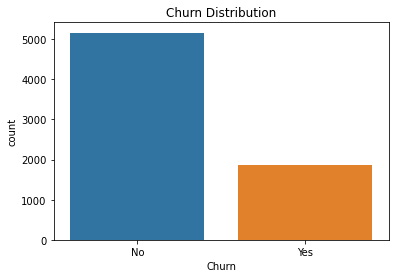

In [8]:
plt.title("Churn Distribution")
sns.countplot(data=df, x='Churn');

In [9]:
#  Check Churn count distribution
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

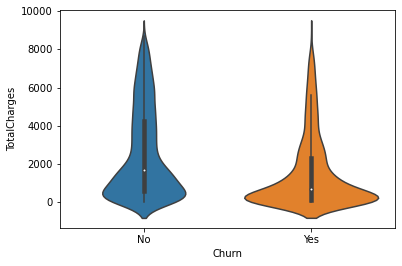

In [10]:
# Violinplot
sns.violinplot(data=df, x='Churn', y='TotalCharges');

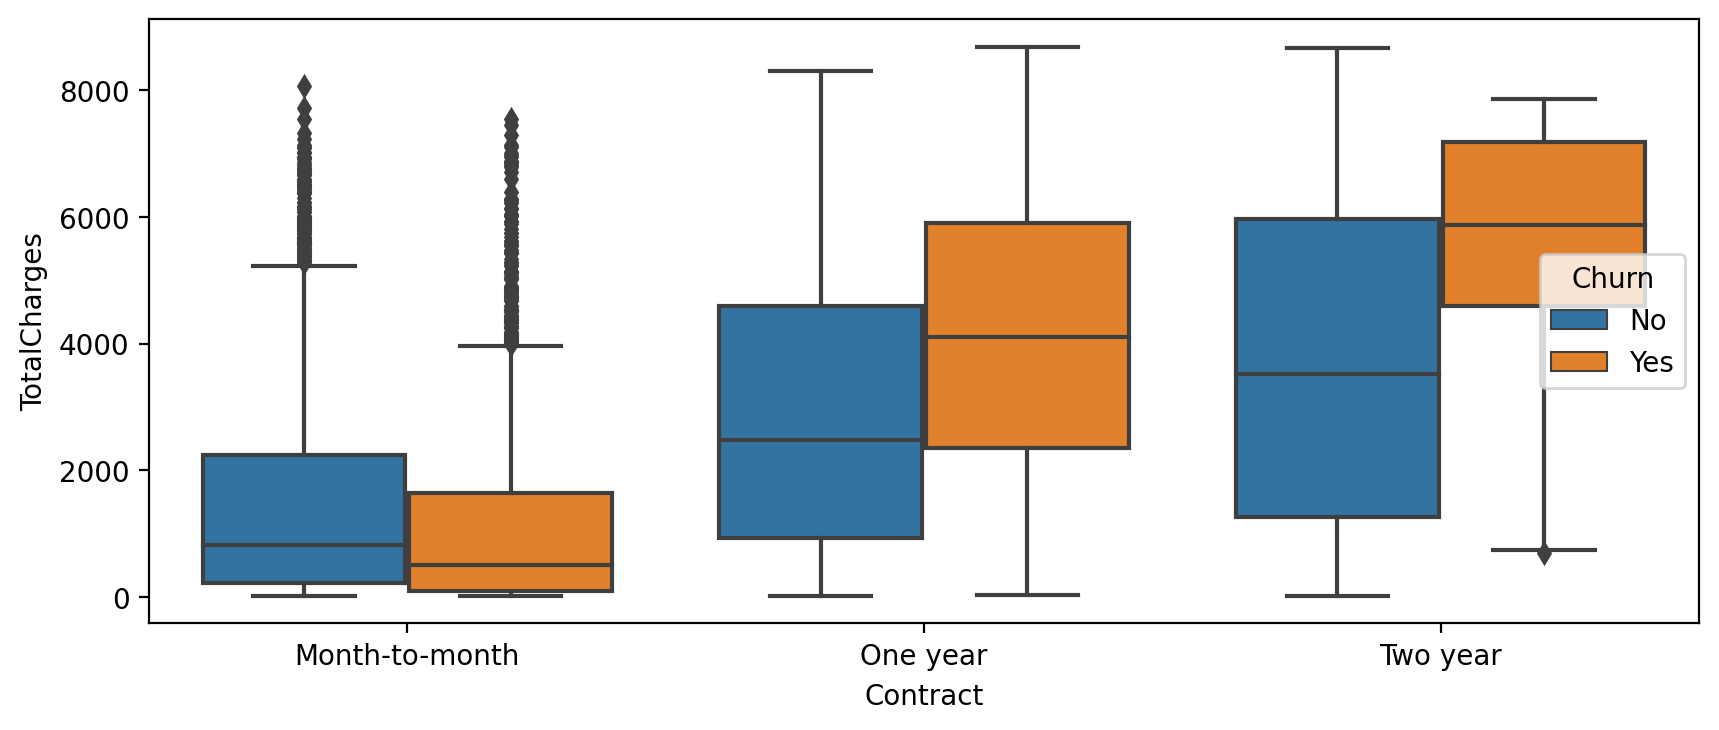

In [11]:
# Box plot
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn');

In [12]:
# Correlation of features. But we have to convert to numerical first
corr_df = pd.get_dummies(df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']], drop_first=True)

In [13]:
corr_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [14]:
# df.corr()

In [15]:
# corr_df = df.corr()

In [16]:
# corr_df = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [17]:
# sns.barplot(x=corr_df.index, y=corr_df.values)

# Churn Analysis

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

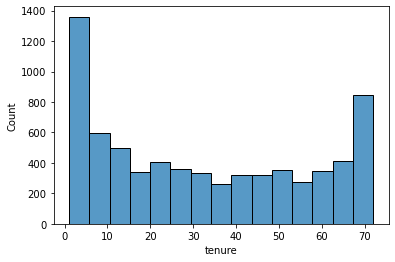

In [19]:
sns.histplot(data=df, x='tenure')

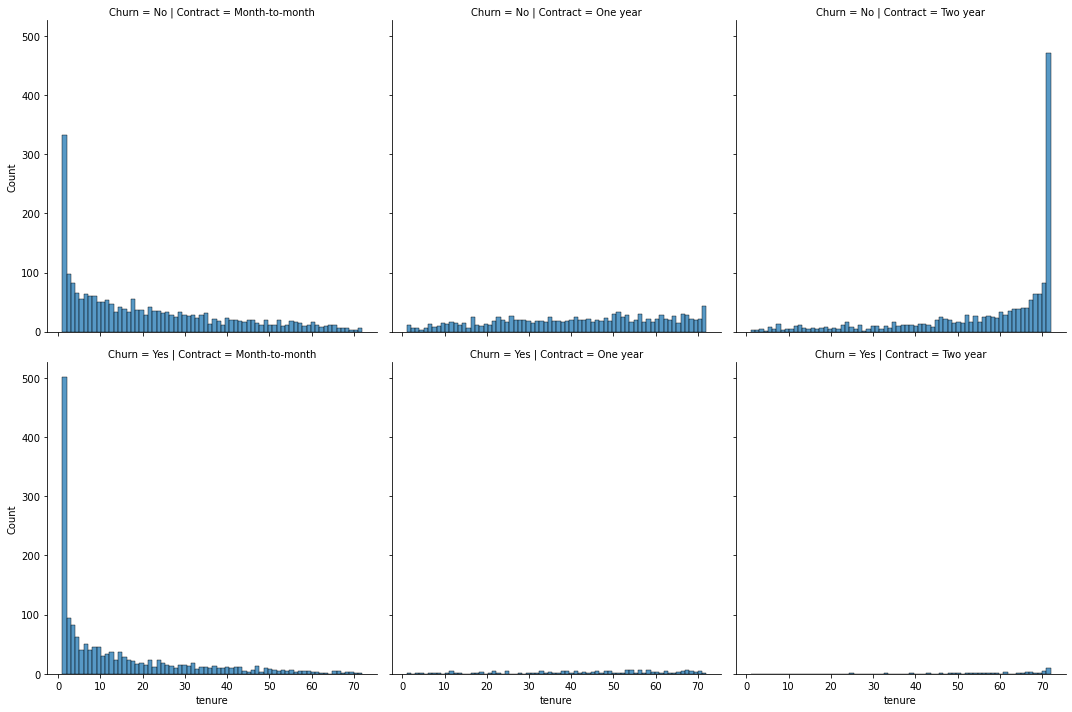

In [20]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

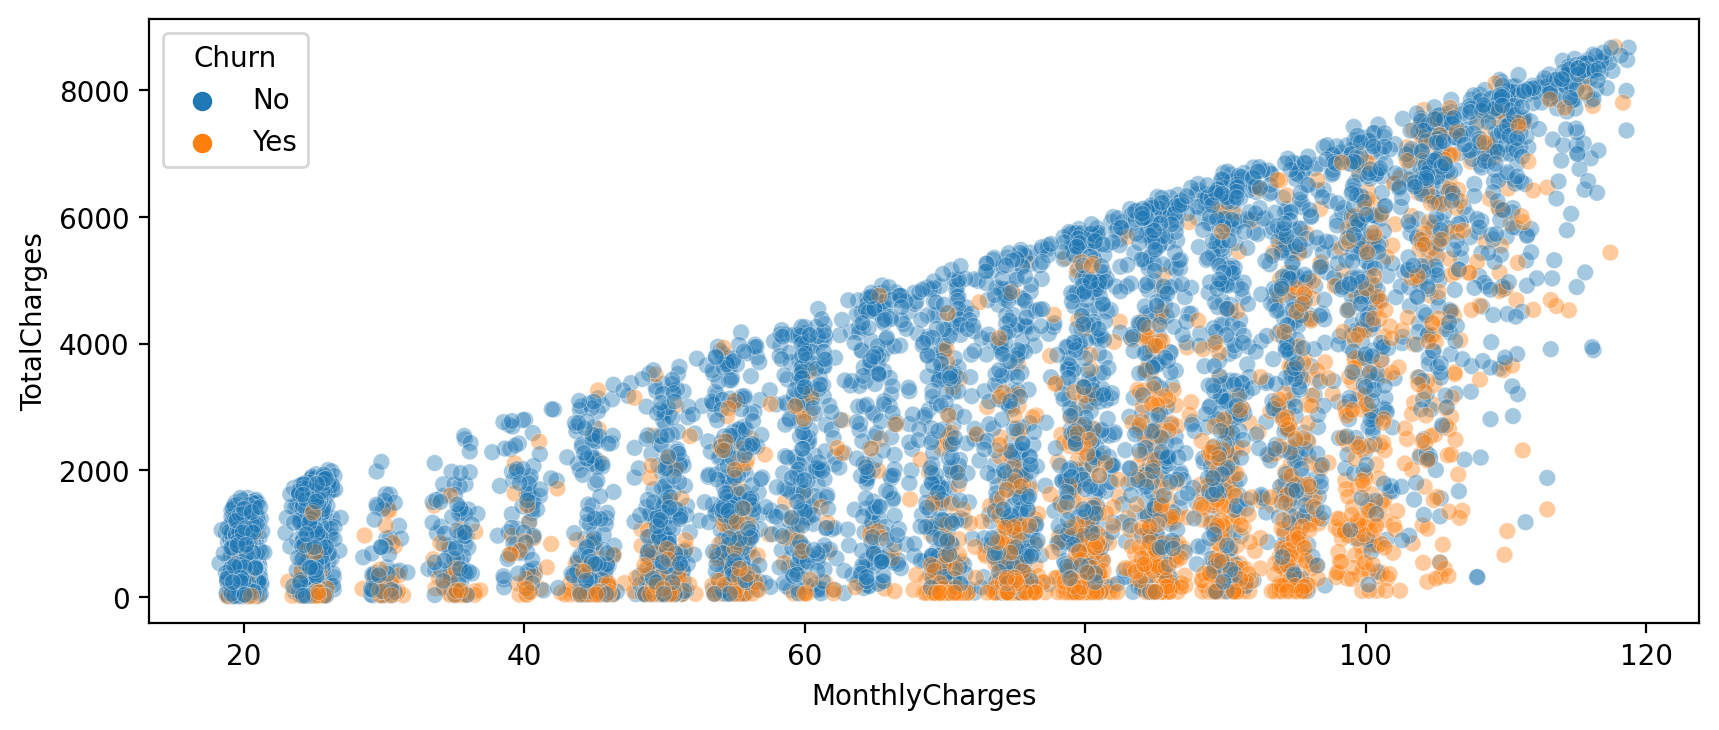

In [21]:
# Display a scatter plot of Total Charges versus montly charges, and clour hue by churn
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.4, linewidth=0.3)

## Creating Cohort based on Tenure

In [22]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [23]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [24]:
churn = df.groupby(['Churn','tenure']).size()
churn_rate = 100 * churn['Yes'] / (churn['No']+churn['Yes'])
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

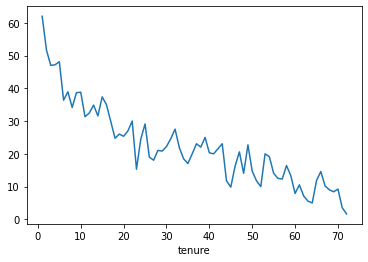

In [25]:
churn_rate.plot()

<AxesSubplot:xlabel='tenure'>

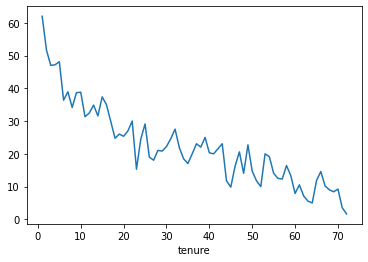

In [26]:
sns.lineplot(x=churn_rate.index, y=churn_rate.values)

## Broader cohort groups

In [27]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure>=12 and tenure <=24:
        return '12-24 Months'
    elif tenure >=24 and tenure <=48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [28]:
df['Tenure Group'] = df['tenure'].apply(cohort)

In [29]:
df[['Tenure Group', 'tenure']]

,Tenure Group,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

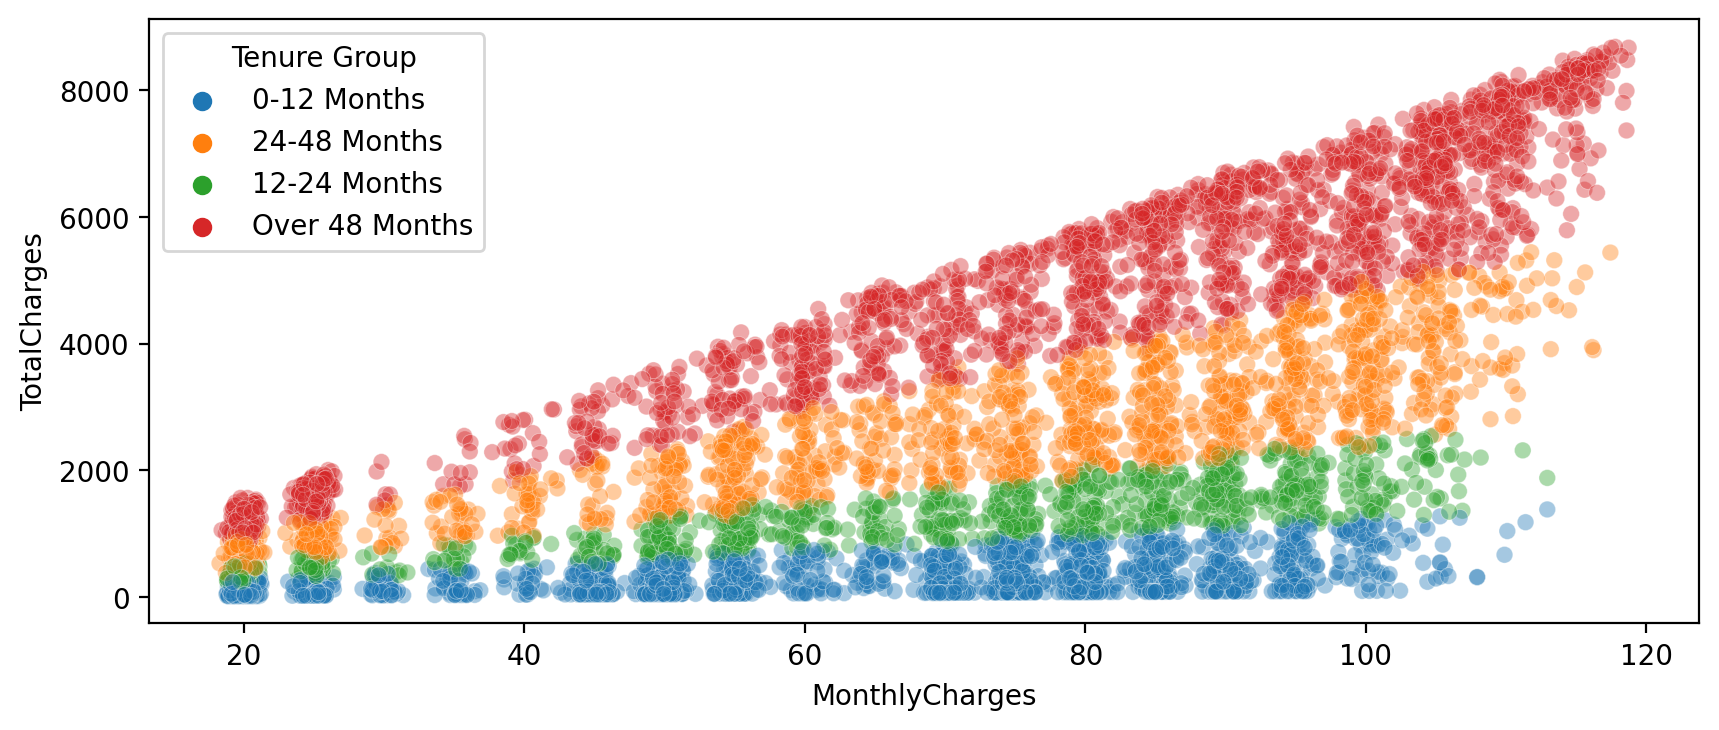

In [30]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Group', alpha=0.4, linewidth=0.3)

<AxesSubplot:xlabel='Tenure Group', ylabel='count'>

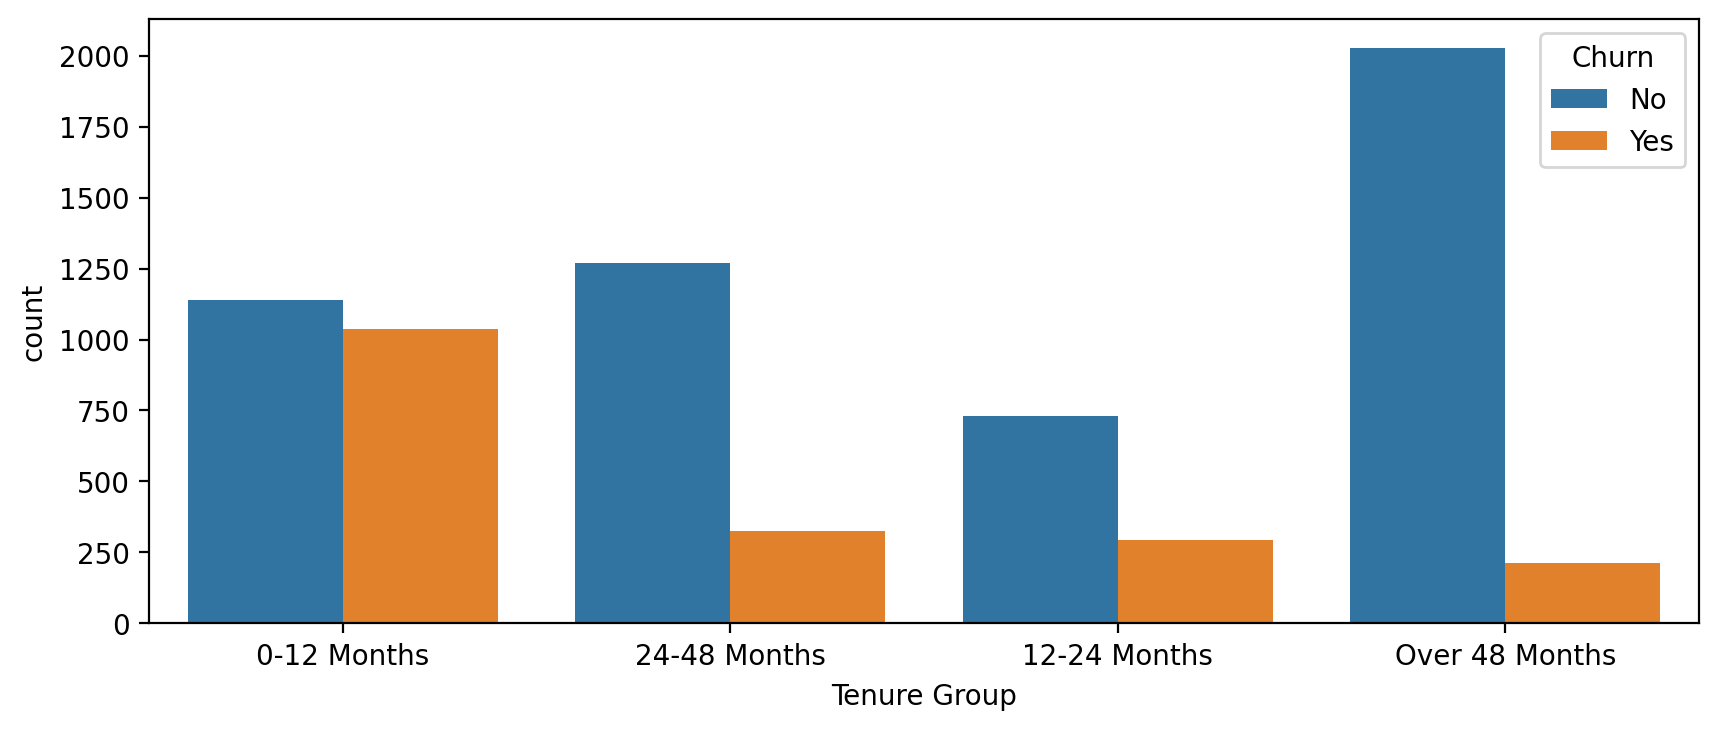

In [31]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df,x='Tenure Group', hue='Churn')

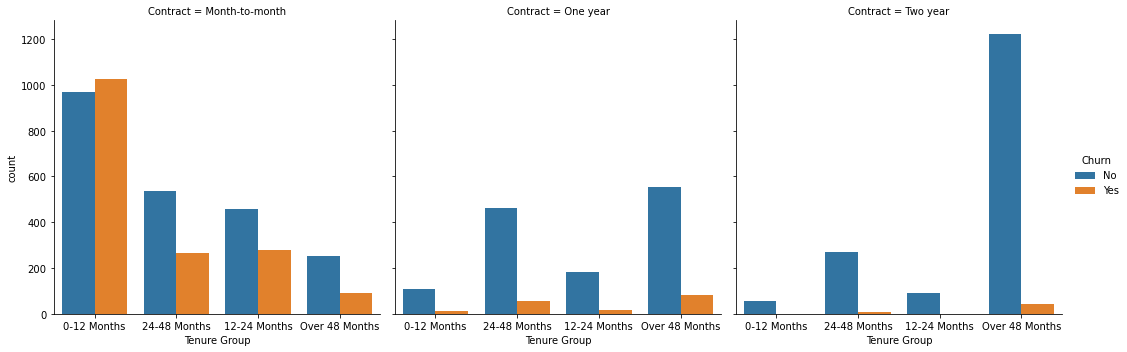

In [32]:
sns.catplot(data=df, x='Tenure Group', hue='Churn', kind='count', col='Contract')

# Single Decision Tree

In [33]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,12-24 Months
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Over 48 Months
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-12 Months
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-12 Months


In [34]:
X = df.drop(['Churn', 'customerID'], axis=1)

In [35]:
X = pd.get_dummies(X, drop_first=True)

In [36]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Group_12-24 Months,Tenure Group_24-48 Months,Tenure Group_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [37]:
y = df['Churn']

In [38]:
# Train and Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
len(X_train), len(y_train), len(X_test), len(y_test)

(6328, 6328, 704, 704)

# Create model

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)

In [41]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [42]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [43]:
preds = dt.predict(X_test)

In [45]:
preds[:5]

array(['Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [47]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       573
         Yes       0.49      0.55      0.52       131

    accuracy                           0.81       704
   macro avg       0.69      0.71      0.70       704
weighted avg       0.82      0.81      0.81       704



C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


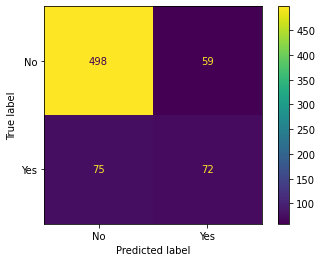

In [48]:
plot_confusion_matrix(dt, X_test, y_test)

In [57]:
dt.feature_importances_

array([0.0126805 , 0.42391407, 0.04348553, 0.06494213, 0.00123697,
       0.        , 0.        , 0.00088963, 0.00696195, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.02628952, 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [58]:
feature_df = pd.DataFrame({'Features': X.columns, 'Importance': dt.feature_importances_})

In [59]:
feature_df = feature_df.sort_values('Importance', ascending=False)

In [60]:
feature_df

,Features,Importance
1,tenure,0.423914
10,InternetService_Fiber optic,0.314060
3,TotalCharges,0.064942
2,MonthlyCharges,0.043486
28,PaymentMethod_Electronic check,0.034436
25,Contract_Two year,0.027065
16,DeviceProtection_No internet service,0.026290
0,SeniorCitizen,0.012680
9,MultipleLines_Yes,0.012432
24,Contract_One year,0.010021


In [61]:
feature_df = feature_df[feature_df['Importance'] > 0]

In [62]:
feature_df

,Features,Importance
1,tenure,0.423914
10,InternetService_Fiber optic,0.314060
3,TotalCharges,0.064942
2,MonthlyCharges,0.043486
28,PaymentMethod_Electronic check,0.034436
25,Contract_Two year,0.027065
16,DeviceProtection_No internet service,0.026290
0,SeniorCitizen,0.012680
9,MultipleLines_Yes,0.012432
24,Contract_One year,0.010021


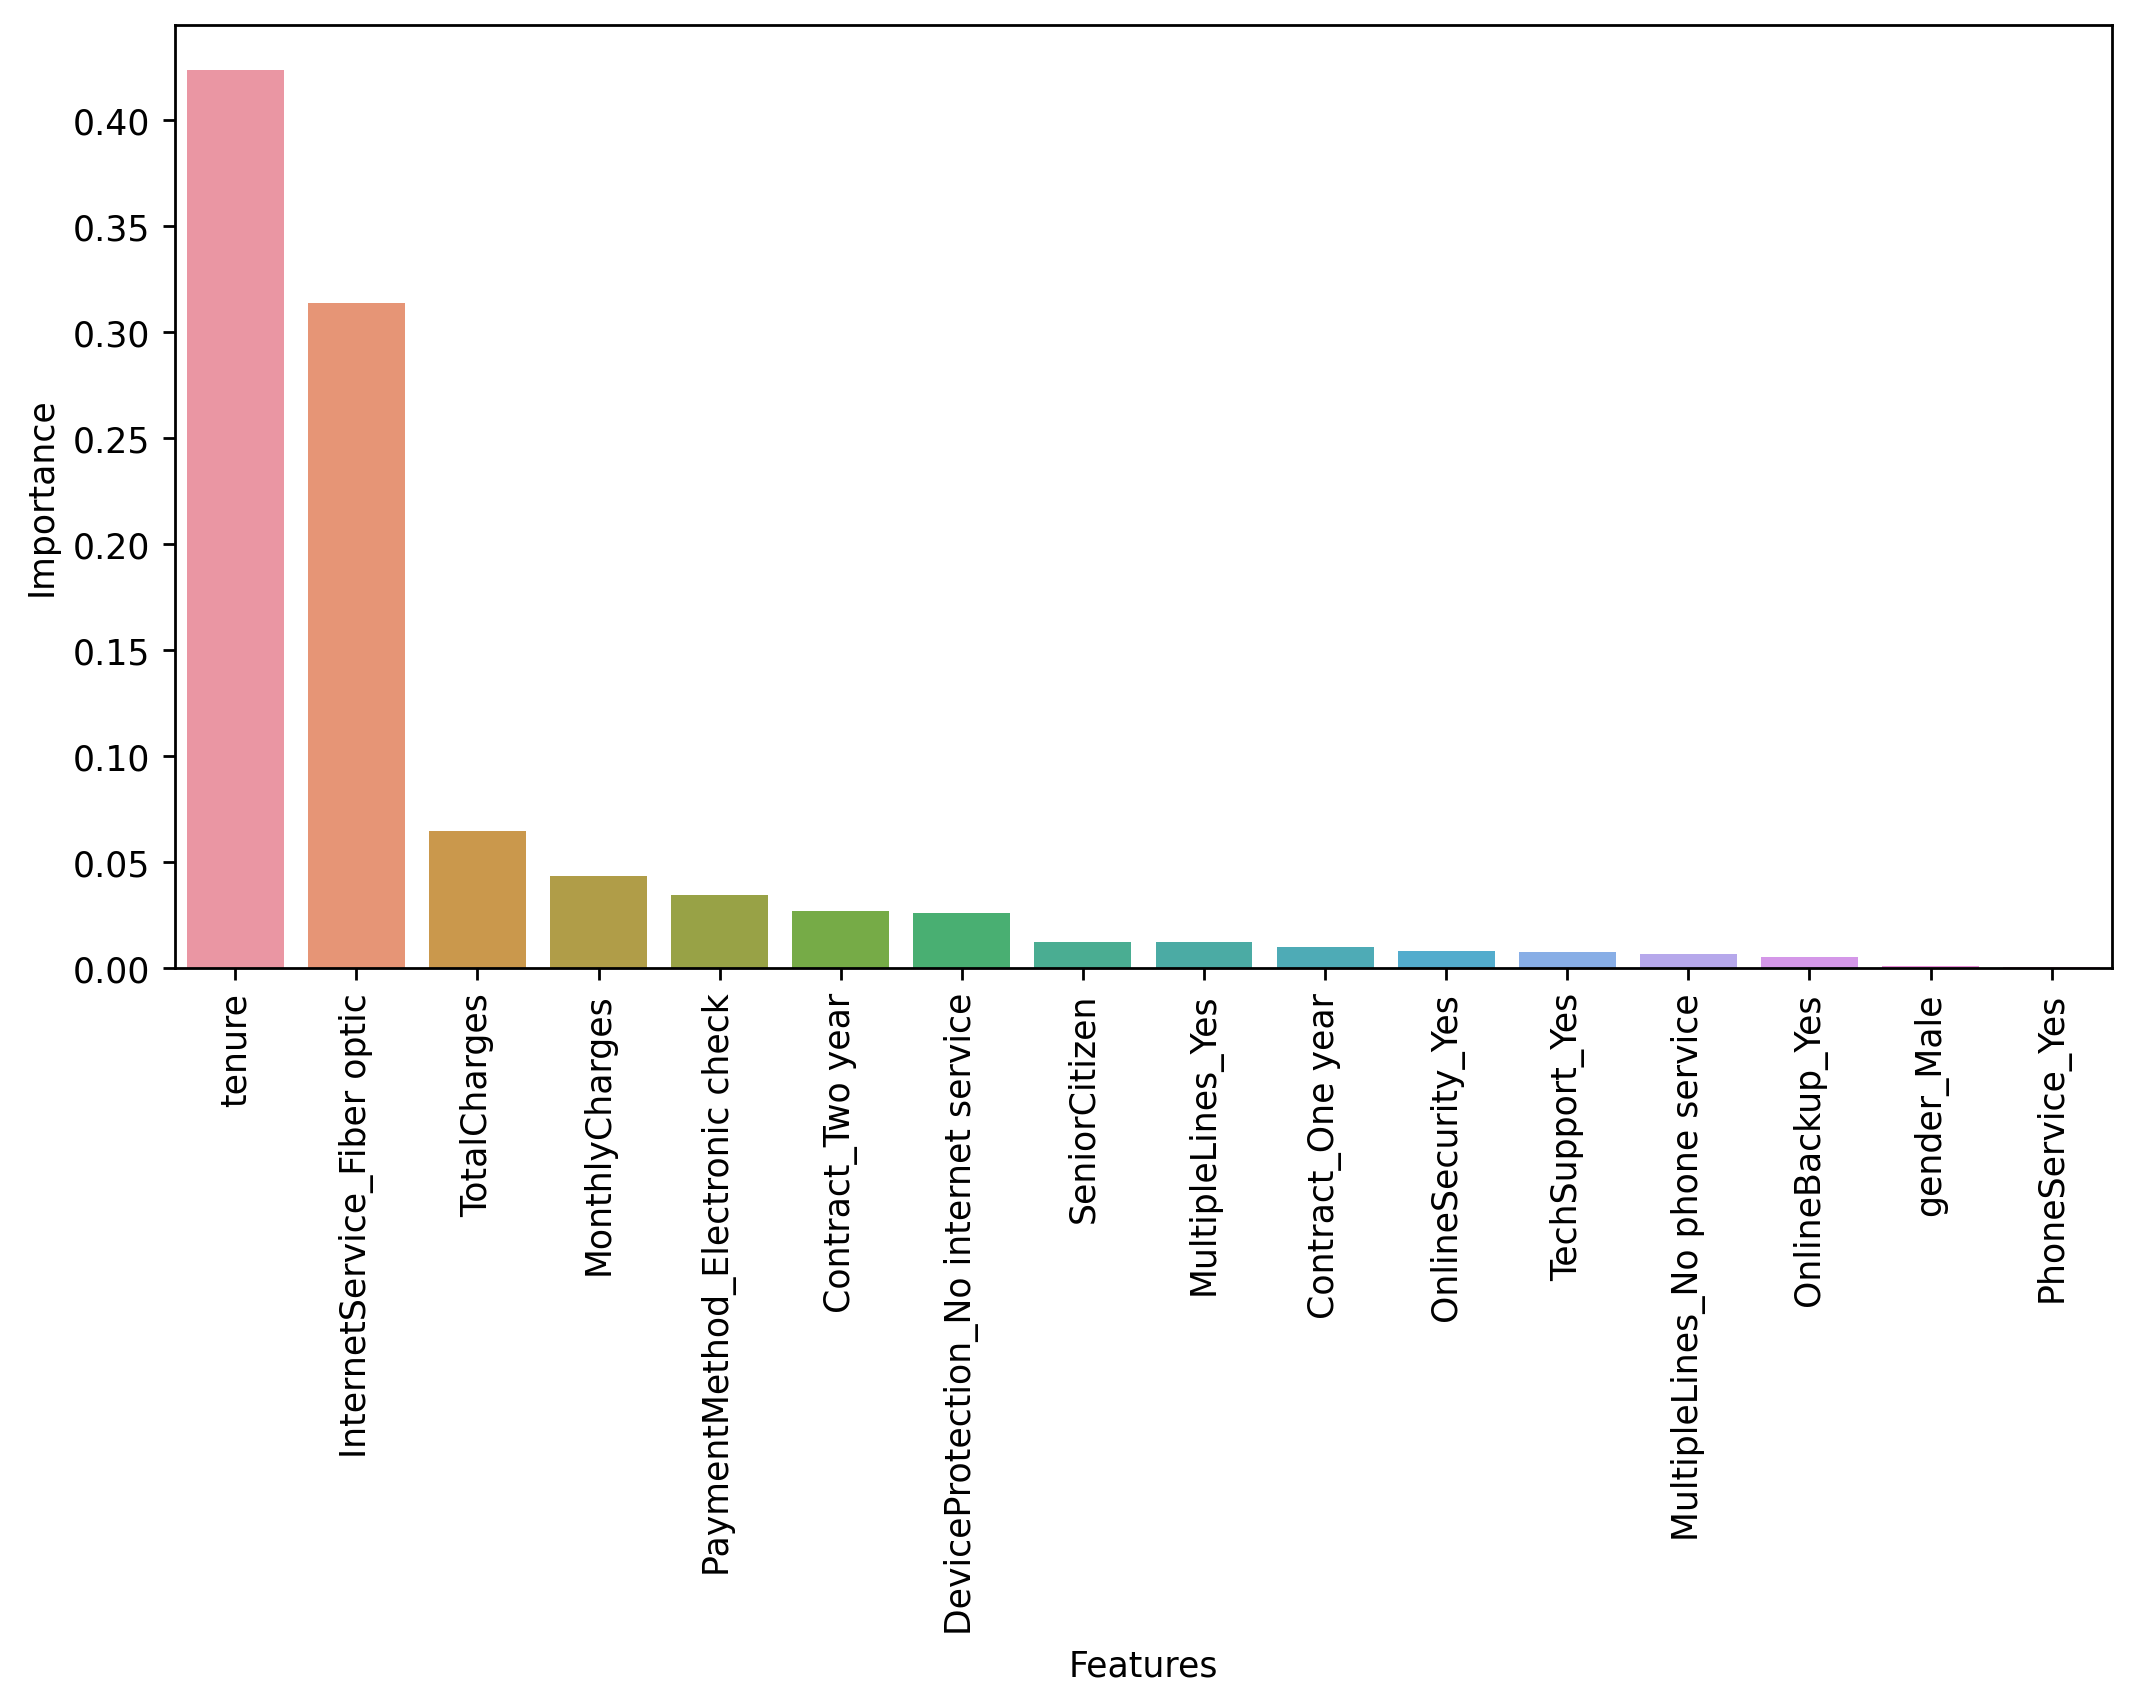

In [73]:
plt.figure(figsize=(10,5), dpi=250)
sns.barplot(data=feature_df, x='Features', y='Importance')
plt.xticks(rotation=90);

In [74]:
from sklearn.tree import plot_tree

[Text(0.48522727272727273, 0.9285714285714286, 'X[1] <= 17.5\ngini = 0.396\nsamples = 6328\nvalue = [4606, 1722]'),
 Text(0.2375, 0.7857142857142857, 'X[10] <= 0.5\ngini = 0.497\nsamples = 2387\nvalue = [1287, 1100]'),
 Text(0.1340909090909091, 0.6428571428571429, 'X[1] <= 5.5\ngini = 0.412\nsamples = 1343\nvalue = [954, 389]'),
 Text(0.07272727272727272, 0.5, 'X[16] <= 0.5\ngini = 0.482\nsamples = 696\nvalue = [414, 282]'),
 Text(0.03636363636363636, 0.35714285714285715, 'X[0] <= 0.5\ngini = 0.5\nsamples = 421\nvalue = [207, 214]'),
 Text(0.01818181818181818, 0.21428571428571427, 'X[2] <= 55.225\ngini = 0.499\nsamples = 370\nvalue = [194, 176]'),
 Text(0.00909090909090909, 0.07142857142857142, 'gini = 0.5\nsamples = 298\nvalue = [145, 153]'),
 Text(0.02727272727272727, 0.07142857142857142, 'gini = 0.435\nsamples = 72\nvalue = [49, 23]'),
 Text(0.05454545454545454, 0.21428571428571427, 'X[3] <= 43.65\ngini = 0.38\nsamples = 51\nvalue = [13, 38]'),
 Text(0.045454545454545456, 0.07142857

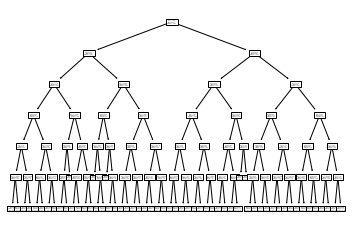

In [75]:
plot_tree(dt)

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(max_depth=6)

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [83]:
preds = rf.predict(X_test)

In [84]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

          No       0.92      0.86      0.89       595
         Yes       0.45      0.61      0.52       109

    accuracy                           0.82       704
   macro avg       0.69      0.73      0.70       704
weighted avg       0.85      0.82      0.83       704



C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


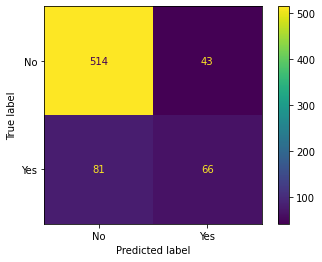

In [87]:
plot_confusion_matrix(rf, X_test, y_test)

# Boosted Trees

In [88]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [96]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [97]:
gb_model = GradientBoostingClassifier()

In [98]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [99]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [100]:
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [101]:
# AdaBoost Performance
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [102]:
# GradientBoosting 
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [104]:
from sklearn.svm import SVC

In [105]:
svc = SVC()

In [106]:
svc.fit(X_train, y_train)

SVC()

In [107]:
svc_preds = svc.predict(X_test)

In [108]:
print(classification_report(svc_preds, y_test))

              precision    recall  f1-score   support

          No       1.00      0.79      0.88       704
         Yes       0.00      0.00      0.00         0

    accuracy                           0.79       704
   macro avg       0.50      0.40      0.44       704
weighted avg       1.00      0.79      0.88       704



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
